# Motor Imagery EEG
##### Creating MNE Raw objects from Matlab Files

In [1]:
import mne


## EEG Data

In [2]:
#Save filepath of subject 19

filepath = r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 19\with occular artifact\cnt.mat"

In [3]:
#Save the raw data 
import numpy as np
from scipy.io import loadmat
import pandas as pd

eeg_matlab = loadmat(filepath)
    
eeg_channels = [item.flat[0] for item in eeg_matlab['cnt'][0][0]['clab'][0][0][0]]    

In [4]:
eeg_channels

['F7',
 'AFF5h',
 'F3',
 'AFp1',
 'AFp2',
 'AFF6h',
 'F4',
 'F8',
 'AFF1h',
 'AFF2h',
 'Cz',
 'Pz',
 'FCC5h',
 'FCC3h',
 'CCP5h',
 'CCP3h',
 'T7',
 'P7',
 'P3',
 'PPO1h',
 'POO1',
 'POO2',
 'PPO2h',
 'P4',
 'FCC4h',
 'FCC6h',
 'CCP4h',
 'CCP6h',
 'P8',
 'T8',
 'VEOG',
 'HEOG']

In [7]:
# Montage data

mnt = loadmat(r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 19\with occular artifact\mnt.mat")

pos_3d = mnt['mnt']['pos_3d'][0][0].T

clab = {}

for i in range(32):
    clab[mnt['mnt']['clab'][0][0][0][i][0]]=pos_3d[i]
 

eeg_mnt = mne.channels.make_dig_montage(clab,coord_frame='head')

Creating RawArray with float64 data, n_channels=32, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


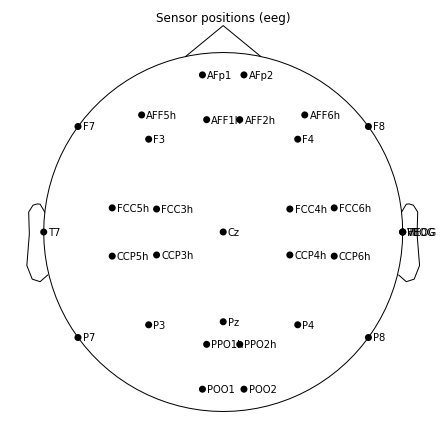

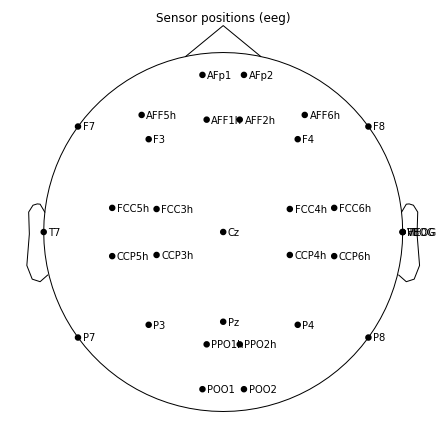

In [8]:
eeg_mnt.plot()

In [9]:
# Initialize an info structure
eeg_info = mne.create_info(
    ch_names=eeg_channels,
    ch_types=['eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg'],
    sfreq=1000)

eeg_info.set_montage(eeg_mnt)

<Info | 8 non-empty values
 bads: []
 ch_names: F7, AFF5h, F3, AFp1, AFp2, AFF6h, F4, F8, AFF1h, AFF2h, Cz, Pz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>

## Create Raw objects

In [10]:
#One different Raw object for each session of MI

eeg_data_1 = pd.DataFrame([[row.flat[0] for row in line] for line 
                           in eeg_matlab['cnt'][0][0]['x'][0][0]],
                          columns=eeg_channels)
eeg_data_2 = pd.DataFrame([[row.flat[0] for row in line] for line
                           in eeg_matlab['cnt'][0][2]['x'][0][0]],
                          columns=eeg_channels)
eeg_data_3 = pd.DataFrame([[row.flat[0] for row in line] for line
                           in eeg_matlab['cnt'][0][4]['x'][0][0]],
                          columns=eeg_channels)

eeg_raw1 = mne.io.RawArray(eeg_data_1.T, eeg_info)
eeg_raw2 = mne.io.RawArray(eeg_data_2.T, eeg_info)
eeg_raw3 = mne.io.RawArray(eeg_data_3.T, eeg_info)

Creating RawArray with float64 data, n_channels=32, n_times=119476
    Range : 0 ... 119475 =      0.000 ...   119.475 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=121055
    Range : 0 ... 121054 =      0.000 ...   121.054 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=119657
    Range : 0 ... 119656 =      0.000 ...   119.656 secs
Ready.


Effective window size : 2.048 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


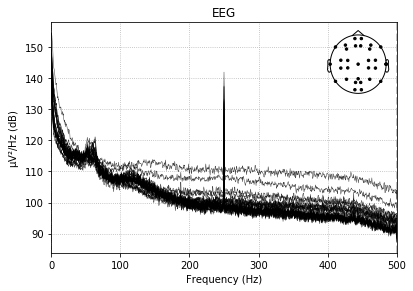

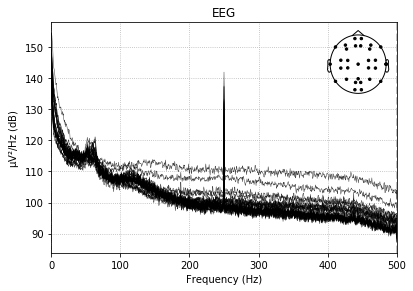

In [11]:
eeg_raw1.plot_psd()

## Downsampling Raw data

In [12]:
#Downsampling Epochs object from all subjects

eeg_raw1.resample(200, npad='auto')
eeg_raw2.resample(200, npad='auto')
eeg_raw3.resample(200, npad='auto')

<RawArray | 32 x 23931 (119.7 s), ~5.9 MB, data loaded>

Effective window size : 10.240 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


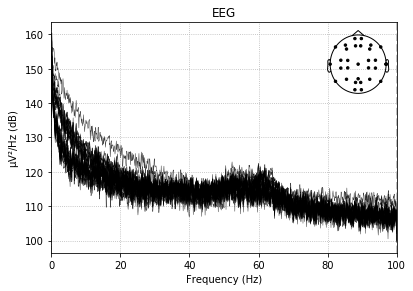

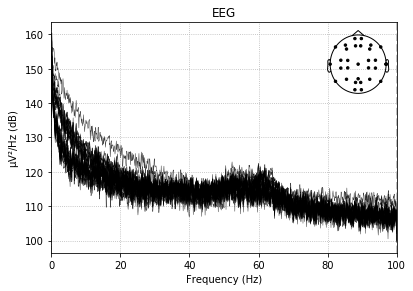

In [13]:
eeg_raw1.plot_psd()

## Re-referencing raw data

In [14]:
#Re-refering EEG signal using common average reference
from mne.datasets import sample
from matplotlib import pyplot as plt

eeg_raw1.set_eeg_reference(ref_channels='average')
eeg_raw2.set_eeg_reference(ref_channels='average')
eeg_raw3.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<RawArray | 32 x 23931 (119.7 s), ~5.9 MB, data loaded>

## Filtering Raw Data

In [18]:
#Passband filter from 0.5Hz to 50Hz

filtered_raw1 = eeg_raw1.filter(l_freq=0.5, 
                                           h_freq=50, picks="all", filter_length='auto',
                                           l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                                           fir_design='firwin')
filtered_raw2 = eeg_raw2.filter(l_freq=0.5, h_freq=50, picks="all", filter_length='auto',
                                           l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                                           fir_design='firwin')
filtered_raw3 = eeg_raw3.copy().filter(l_freq=0.5, h_freq=50, picks="all", filter_length='auto',
                                           l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                                           fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband 

Effective window size : 10.240 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


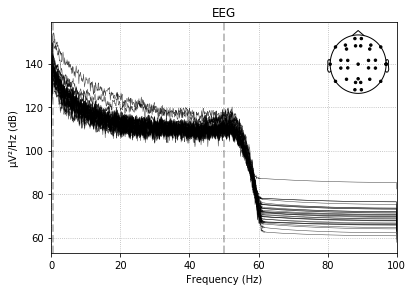

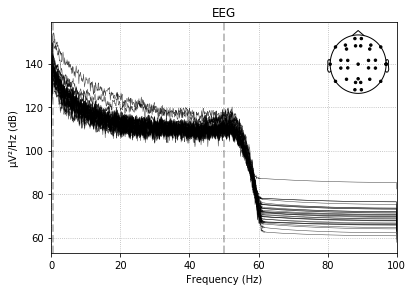

In [19]:
filtered_raw1.plot_psd()

## Band-pass filter raw data

In [20]:
refiltered_raw1 = filtered_raw1.filter(l_freq=8, h_freq=25, picks="all", filter_length='auto', 
                                       l_trans_bandwidth='auto',  h_trans_bandwidth='auto', 
                                       fir_design='firwin')
refiltered_raw2 = filtered_raw2.filter(l_freq=8, h_freq=25, picks="all", filter_length='auto', 
                                       l_trans_bandwidth='auto', h_trans_bandwidth='auto', 
                                       fir_design='firwin')
refiltered_raw3 = filtered_raw3.filter(l_freq=8, h_freq=25, picks="all", filter_length='auto', 
                                       l_trans_bandwidth='auto', h_trans_bandwidth='auto', 
                                       fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

Effective window size : 10.240 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


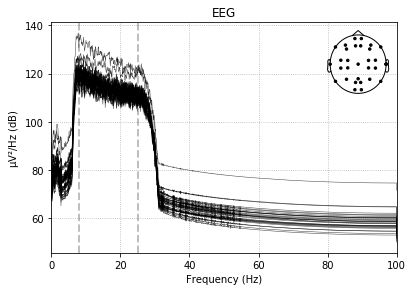

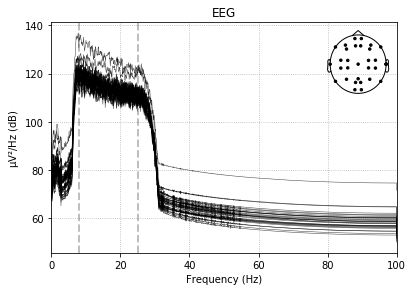

In [21]:
refiltered_raw1.plot_psd()

## Add events to each raw object

In [23]:
epo_filepath = r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 19\with occular artifact\mrk.mat"

In [24]:
eeg_matlab_epochs = loadmat(epo_filepath)

In [25]:
eeg_events1=np.transpose(np.vstack(
        ((eeg_matlab_epochs['mrk'][0][0][0][0][0][0])/1000,
         np.vstack((np.zeros(20),np.transpose(eeg_matlab_epochs['mrk'][0][0][0][0][1][0][0][0])[0])))))
eeg_events2=np.transpose(np.vstack(
        ((eeg_matlab_epochs['mrk'][0][2][0][0][0][0])/1000,
         np.vstack((np.zeros(20),np.transpose(eeg_matlab_epochs['mrk'][0][2][0][0][1][0][0][0])[0])))))
eeg_events3=np.transpose(np.vstack(
        ((eeg_matlab_epochs['mrk'][0][4][0][0][0][0])/1000,
         np.vstack((np.zeros(20),np.transpose(eeg_matlab_epochs['mrk'][0][4][0][0][1][0][0][0])[0])))))

In [26]:
eeg_events1

array([[ 30.   ,   0.   ,  32.   ],
       [ 57.484,   0.   ,  16.   ],
       [ 84.97 ,   0.   ,  32.   ],
       [113.454,   0.   ,  16.   ],
       [142.911,   0.   ,  32.   ],
       [172.422,   0.   ,  16.   ],
       [199.93 ,   0.   ,  16.   ],
       [228.412,   0.   ,  32.   ],
       [256.885,   0.   ,  32.   ],
       [284.407,   0.   ,  16.   ],
       [312.906,   0.   ,  16.   ],
       [340.423,   0.   ,  32.   ],
       [369.915,   0.   ,  32.   ],
       [397.411,   0.   ,  16.   ],
       [425.913,   0.   ,  32.   ],
       [453.432,   0.   ,  16.   ],
       [481.933,   0.   ,  32.   ],
       [509.389,   0.   ,  16.   ],
       [537.882,   0.   ,  16.   ],
       [567.377,   0.   ,  32.   ]])

In [27]:
#Information about the events
event_id = dict(S_16=16, S_32=32)

In [28]:
eeg_epochs1 = mne.Epochs(refiltered_raw1, eeg_events1.astype(int),
                         event_id=event_id,preload=True,proj=True,tmin=-1.,tmax=4.,
                         picks="all",baseline=None)
eeg_epochs2 = mne.Epochs(refiltered_raw2, eeg_events2.astype(int),
                         event_id=event_id,preload=True,proj=True,tmin=-1.,tmax=4.,
                         picks="all",baseline=None)
eeg_epochs3 = mne.Epochs(refiltered_raw3, eeg_events3.astype(int),
                         event_id=event_id,preload=True,proj=True,tmin=-1.,tmax=4.,
                         picks="all",baseline=None)


20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
7 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
6 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
7 bad epochs dropped


In [29]:
eeg_epochs = mne.concatenate_epochs((eeg_epochs1,eeg_epochs2,eeg_epochs3),add_offset=True)

40 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped


In [31]:
eeg_epochs["S_16"]

<Epochs  |   20 events (all good), -1 - 4 sec, baseline off, ~5.0 MB, data loaded,
 'S_16': 20>

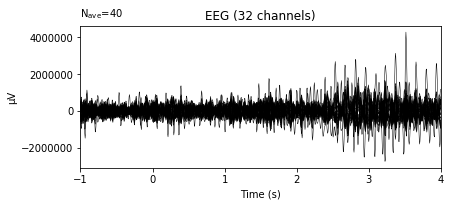

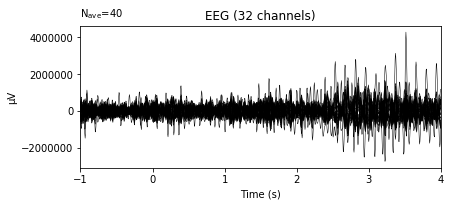

In [32]:
eeg_epochs.average().plot(time_unit='s')

# CSP

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

In [34]:
test = eeg_epochs.copy().drop_channels(['VEOG','HEOG'])

    Using multitaper spectrum estimation with 7 DPSS windows


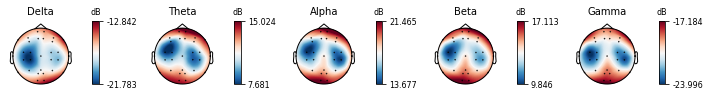

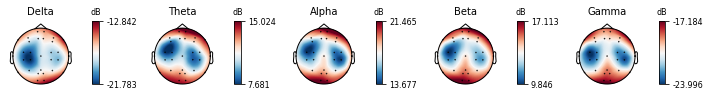

In [35]:
test.plot_psd_topomap()

In [36]:
# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs_train = test.copy().crop(tmin=1, tmax=2)
labels = test.events[:, -1] - 2

Computing rank from data with rank=None
    Using tolerance 3 (2.2e-16 eps * 30 dim * 4.6e+14  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.8 (2.2e-16 eps * 30 dim * 4.2e+14  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.9 (2.2e-16 eps * 30 dim * 4.4e+14  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.9 (2.2e-16 eps * 30 dim * 4.3e+14  max singular value)
    Estimated rank

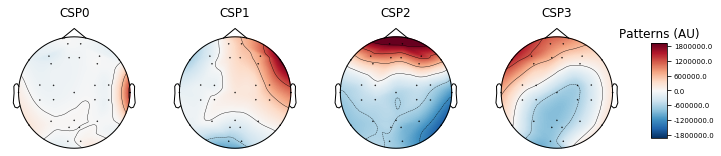

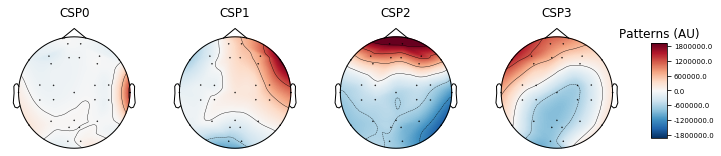

In [37]:
# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = test.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

csp.plot_patterns(test.info, ch_type='eeg', units='Patterns (AU)', size=1.5)

In [ ]:
cv_split = cv.split(epochs_data_train)
sfreq = test.info['sfreq']
epochs_data = test.get_data()
w_length = 3#int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
#print(w_start.T)
#print(w_start.shape)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)



# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs_resampled.tmin
#print(w_times.shape)

#plt.figure()
#print(scores_windows)
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()